# Transformation

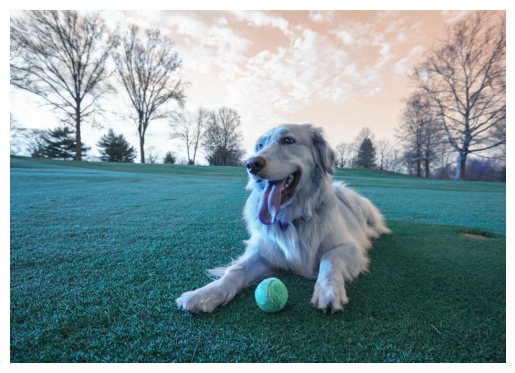

In [2]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread(r"dogpark.jpg")
plt.imshow(image)
plt.axis('off')
plt.show()

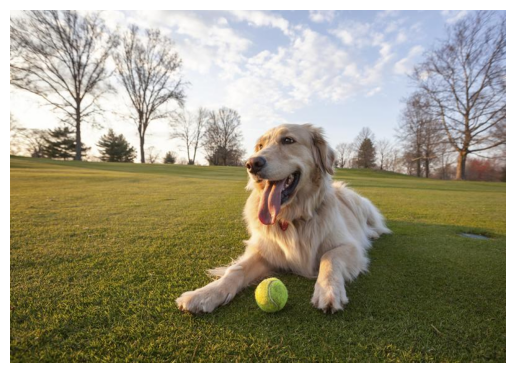

In [4]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()



In [3]:
height, width = image.shape[:2]
print(height)
print(width)

1600
1920


# Translation

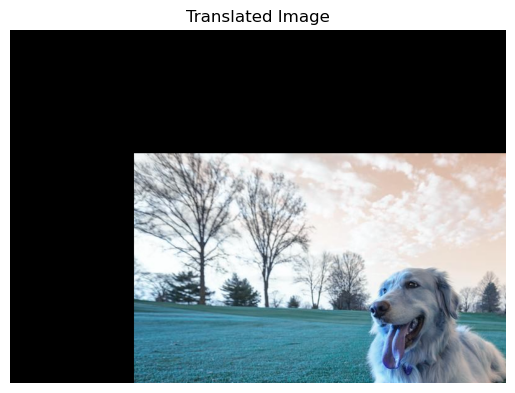

In [6]:
import numpy as np

height, width = image.shape[:2]

tx, ty = 200, 200 

translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])

translated_image = cv2.warpAffine(image, translation_matrix, (width, height))

plt.imshow(translated_image)
plt.title("Translated Image")
plt.axis("off")
plt.show()


## matrix based translation

In [9]:
height, width, channels = image.shape
print(height)
print(width)
print(channels)



570
800
3


In [11]:
tx, ty = 200, 200  

x, y = np.meshgrid(np.arange(width), np.arange(height))
print("x:",x)
print("y:",y)

x: [[  0   1   2 ... 797 798 799]
 [  0   1   2 ... 797 798 799]
 [  0   1   2 ... 797 798 799]
 ...
 [  0   1   2 ... 797 798 799]
 [  0   1   2 ... 797 798 799]
 [  0   1   2 ... 797 798 799]]
y: [[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [567 567 567 ... 567 567 567]
 [568 568 568 ... 568 568 568]
 [569 569 569 ... 569 569 569]]


In [13]:
flat_x = x.flatten()
flat_y = y.flatten()
print(flat_x)
print(flat_y)

[  0   1   2 ... 797 798 799]
[  0   0   0 ... 569 569 569]


In [15]:
ones = np.ones_like(flat_x)
original_coords = np.stack([flat_x, flat_y, ones], axis=0)
print(original_coords)

[[  0   1   2 ... 797 798 799]
 [  0   0   0 ... 569 569 569]
 [  1   1   1 ...   1   1   1]]


In [17]:
translation_matrix = np.array([[1, 0, tx], [0, 1, ty], [0, 0, 1]])
print(translation_matrix)

[[  1   0 200]
 [  0   1 200]
 [  0   0   1]]


In [19]:
new_coords = translation_matrix @ original_coords
print(new_coords)

[[200 201 202 ... 997 998 999]
 [200 200 200 ... 769 769 769]
 [  1   1   1 ...   1   1   1]]


In [21]:
new_x, new_y = new_coords[:2].astype(int) 
print(new_x)
print(new_y)

[200 201 202 ... 997 998 999]
[200 200 200 ... 769 769 769]


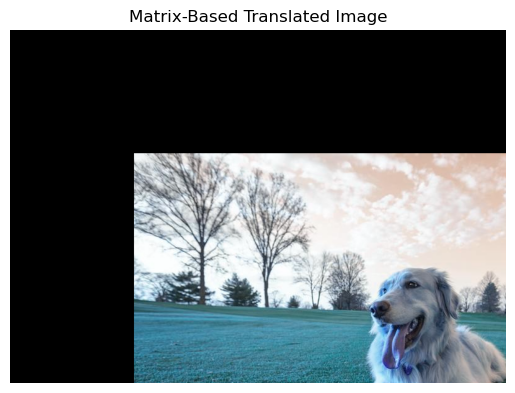

In [23]:

translated_image = np.zeros_like(image)
valid_idx = (new_x >= 0) & (new_x < width) & (new_y >= 0) & (new_y < height)

translated_image[new_y[valid_idx], new_x[valid_idx]] = image[flat_y[valid_idx], flat_x[valid_idx]]

plt.imshow(translated_image)
plt.title("Matrix-Based Translated Image")
plt.axis("off")
plt.show()


# Rotation

In [26]:
height, width, channels = image.shape
print(height)
print(width)
print(channels)

570
800
3


In [28]:
theta = 45  
theta_rad = np.deg2rad(theta)
print(theta_rad)

0.7853981633974483


In [30]:
center_x, center_y = width // 2, height // 2
print(center_x)
print(center_y)

400
285


In [32]:
x, y = np.meshgrid(np.arange(width), np.arange(height))
print("x:",x)
print("y:",y)

x: [[  0   1   2 ... 797 798 799]
 [  0   1   2 ... 797 798 799]
 [  0   1   2 ... 797 798 799]
 ...
 [  0   1   2 ... 797 798 799]
 [  0   1   2 ... 797 798 799]
 [  0   1   2 ... 797 798 799]]
y: [[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [567 567 567 ... 567 567 567]
 [568 568 568 ... 568 568 568]
 [569 569 569 ... 569 569 569]]


In [34]:
flat_x = x.flatten()
flat_y = y.flatten()
print(flat_x)
print(flat_y)

[  0   1   2 ... 797 798 799]
[  0   0   0 ... 569 569 569]


In [38]:
centered_x = flat_x - center_x
centered_y = flat_y - center_y
print(centered_x)
print(centered_y)

[-400 -399 -398 ...  397  398  399]
[-285 -285 -285 ...  284  284  284]


In [40]:
rotation_matrix = np.array([[np.cos(theta_rad), -np.sin(theta_rad)],
                            [np.sin(theta_rad), np.cos(theta_rad)]])
print(rotation_matrix)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [42]:
rotated_coords = rotation_matrix @ np.vstack([centered_x, centered_y])
print(rotated_coords)

[[ -81.31727984  -80.61017306  -79.90306627 ...   79.90306627
    80.61017306   81.31727984]
 [-484.36814511 -483.66103833 -482.95393155 ...  481.53971799
   482.24682477  482.95393155]]


In [44]:
rotated_x = rotated_coords[0, :] + center_x
rotated_y = rotated_coords[1, :] + center_y
print(rotated_x)
print(rotated_y)


[318.68272016 319.38982694 320.09693373 ... 479.90306627 480.61017306
 481.31727984]
[-199.36814511 -198.66103833 -197.95393155 ...  766.53971799  767.24682477
  767.95393155]


In [46]:
rotated_x = np.round(rotated_x).astype(int)
rotated_y = np.round(rotated_y).astype(int)
print(rotated_x)
print(rotated_y)

[319 319 320 ... 480 481 481]
[-199 -199 -198 ...  767  767  768]


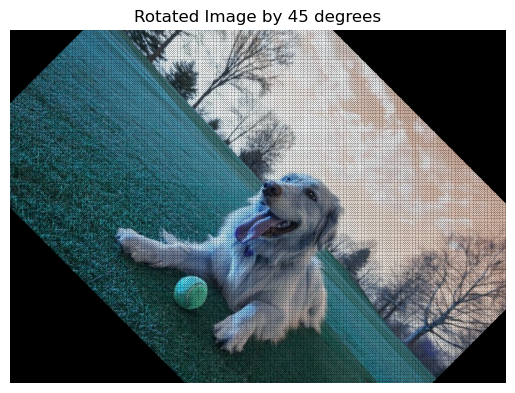

In [48]:
rotated_image = np.zeros_like(image)
valid_idx = (rotated_x >= 0) & (rotated_x < width) & (rotated_y >= 0) & (rotated_y < height)
rotated_image[rotated_y[valid_idx], rotated_x[valid_idx]] = image[flat_y[valid_idx], flat_x[valid_idx]]
plt.imshow(rotated_image)
plt.title(f"Rotated Image by {theta} degrees")
plt.axis("off")
plt.show()


# Scaling

In [53]:
image = cv2.imread(r"dogpark.jpg")
height, width, channels = image.shape
print(height)
print(width)
print(channels)

570
800
3


In [55]:
scale_x = 1.5 
scale_y = 1.5  
y, x = np.indices((height, width))  
print(x)
print(y)

[[  0   1   2 ... 797 798 799]
 [  0   1   2 ... 797 798 799]
 [  0   1   2 ... 797 798 799]
 ...
 [  0   1   2 ... 797 798 799]
 [  0   1   2 ... 797 798 799]
 [  0   1   2 ... 797 798 799]]
[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [567 567 567 ... 567 567 567]
 [568 568 568 ... 568 568 568]
 [569 569 569 ... 569 569 569]]


In [57]:
scaled_x = scale_x * (x - width // 2) + width // 2  
scaled_y = scale_y * (y - height // 2) + height // 2 
scaled_x = np.round(scaled_x).astype(int)
scaled_y = np.round(scaled_y).astype(int)
print(scaled_x)
print(scaled_y)

[[-200 -198 -197 ...  996  997  998]
 [-200 -198 -197 ...  996  997  998]
 [-200 -198 -197 ...  996  997  998]
 ...
 [-200 -198 -197 ...  996  997  998]
 [-200 -198 -197 ...  996  997  998]
 [-200 -198 -197 ...  996  997  998]]
[[-142 -142 -142 ... -142 -142 -142]
 [-141 -141 -141 ... -141 -141 -141]
 [-140 -140 -140 ... -140 -140 -140]
 ...
 [ 708  708  708 ...  708  708  708]
 [ 710  710  710 ...  710  710  710]
 [ 711  711  711 ...  711  711  711]]


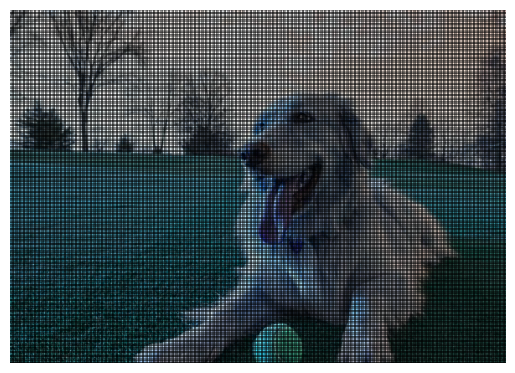

In [59]:
valid_idx = (scaled_x >= 0) & (scaled_x < width) & (scaled_y >= 0) & (scaled_y < height)

# Create an output image with the same dimensions
scaled_image = np.zeros_like(image)

# Map the scaled coordinates to the output image
scaled_image[scaled_y[valid_idx], scaled_x[valid_idx]] = image[y[valid_idx], x[valid_idx]]

# Display the scaled image
plt.imshow(scaled_image)
plt.axis('off')
plt.show()


## shearing

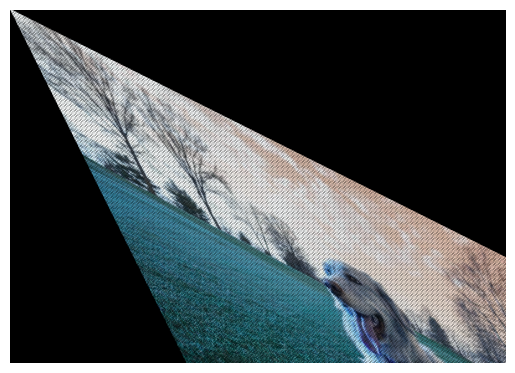

In [61]:

height, width = image.shape[:2]


sh_x = 0.5  
sh_y = 0.5  


y, x = np.indices((height, width))  


sheared_x = x + sh_x * y


sheared_y = y + sh_y * x


sheared_x = np.round(sheared_x).astype(int)
sheared_y = np.round(sheared_y).astype(int)


valid_idx = (sheared_x >= 0) & (sheared_x < width) & (sheared_y >= 0) & (sheared_y < height)


sheared_image = np.zeros_like(image)


sheared_image[sheared_y[valid_idx], sheared_x[valid_idx]] = image[y[valid_idx], x[valid_idx]]


plt.imshow(sheared_image)
plt.axis('off')
plt.show()


## reflection

In [65]:
image = cv2.imread(r"dogpark.jpg")
height, width = image.shape[:2]
print(height)
print(width)


570
800


In [67]:
y, x = np.indices((height, width))
print(x)
print(y)

[[  0   1   2 ... 797 798 799]
 [  0   1   2 ... 797 798 799]
 [  0   1   2 ... 797 798 799]
 ...
 [  0   1   2 ... 797 798 799]
 [  0   1   2 ... 797 798 799]
 [  0   1   2 ... 797 798 799]]
[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [567 567 567 ... 567 567 567]
 [568 568 568 ... 568 568 568]
 [569 569 569 ... 569 569 569]]


In [69]:
reflected_x = width - 1 - x
print(reflected_x)

[[799 798 797 ...   2   1   0]
 [799 798 797 ...   2   1   0]
 [799 798 797 ...   2   1   0]
 ...
 [799 798 797 ...   2   1   0]
 [799 798 797 ...   2   1   0]
 [799 798 797 ...   2   1   0]]


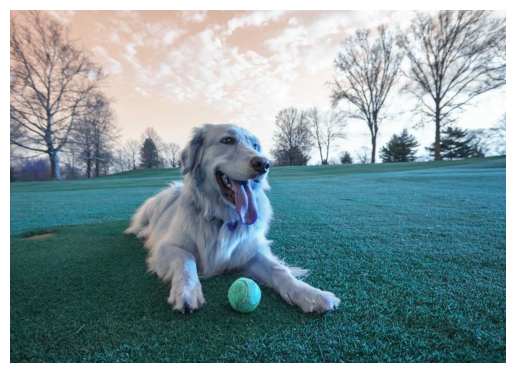

In [71]:
reflected_x = np.clip(reflected_x, 0, width - 1)
reflected_image = np.zeros_like(image)
reflected_image[y, reflected_x] = image[y, x]
plt.imshow(reflected_image)
plt.axis('off')
plt.show()
